## 1. Data Generation 


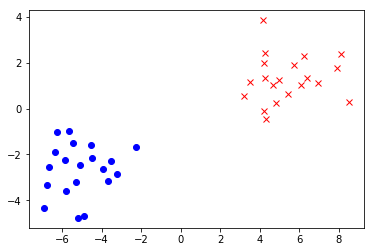

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

N = 20
m1 = [5,1]
m2 = [-5, -3]
s = np.array([[1.,0.],[0.,1.]])
X1 = np.random.multivariate_normal(m1,s, N).T
X2 = np.random.multivariate_normal(m2,s, N).T 

X = np.concatenate((X1,X2), axis = 1)
y = np.array([1.]*N + [-1.]*N)
plt.plot(X1[0,:],X1[1,:],'rx')
plt.plot(X2[0,:],X2[1,:],'bo')
plt.show()

## 2. Math 

### 1. Model 
$$ y = sgn(w^Tx) $$

y = 1  if $w^Tx \geq 0 $

y = -1 if $w^Tx < 0 $

### 2. Loss Function 

$$ L(w) = \sum_{x \in M} -y(w^T.x) $$  

- M is set of misclassified points.
- If $(x_i,y_i)$ is a point misclassified then -y(w^Tx) > 0 then Loss function is great if there are many misclassified points. 

### 3. Derivative at one point $(x_i,y_i)$ 

$$ \frac{\delta L(w,x_i,y_i)}{\delta w} = -y_ix_i$$ 

## 3. Programming

In [20]:
## initialize w shape (d+1,1)
d = X.shape[0]

w = np.random.randn(d+1,1)

X_hat = np.concatenate((X,np.ones((1,X.shape[1]))),axis = 0)



##stochastic gradient descent 


def has_converge(w,X,y): 
    error = np.sign(w.T.dot(X) - y) 
    return np.linalg.norm(error) <= 1e-2
def gradient_descent(w,n_iters = 1000,epochs = 10 , eta = 1):
    for _ in range(epochs): 
        shuffle_idx = np.random.permutation(2*N)
        for i in shuffle_idx:
            x_i = X_hat[:,i]
            y_i = y[i]
            if y_i*(w.T.dot(x_i)) >0:
                continue
            w = w + eta*(y_i*w)
            if has_converge(w,X_hat,y):
                return w
    return w 
            
    

In [21]:
w_ = gradient_descent(w)

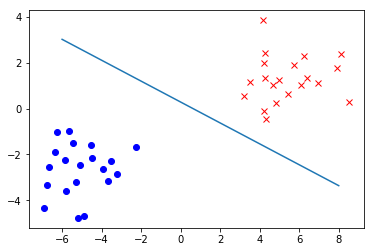

In [27]:
w1 = w[0,0]
w2 = w[1,0]
w0 = w[2,0]


x1, x2 = -6,8
y1 = (-w1*x1 -w0) / w2
y2 = (-w1*x2 -w0) / w2

plt.plot(X1[0,:],X1[1,:],'rx')
plt.plot(X2[0,:],X2[1,:],'bo')
plt.plot([x1,x2],[y1,y2])
plt.show()

In [23]:
np.sign(w_.T.dot(X_hat))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1.]])

In [34]:
w_ 

array([[ 0.4376637 ],
       [ 0.96132346],
       [-0.27159861]])

In [31]:
## Check with scikit learn 

from sklearn.linear_model import Perceptron

pct = Perceptron(tol = 1e-2, eta0= 1,n_iter=1000)

pct.fit(X.T,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1,
      fit_intercept=True, max_iter=None, n_iter=1000, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.01,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
pct.coef_

array([[4.84275694, 0.25872077]])

In [33]:
pct.intercept_

array([1.])